![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


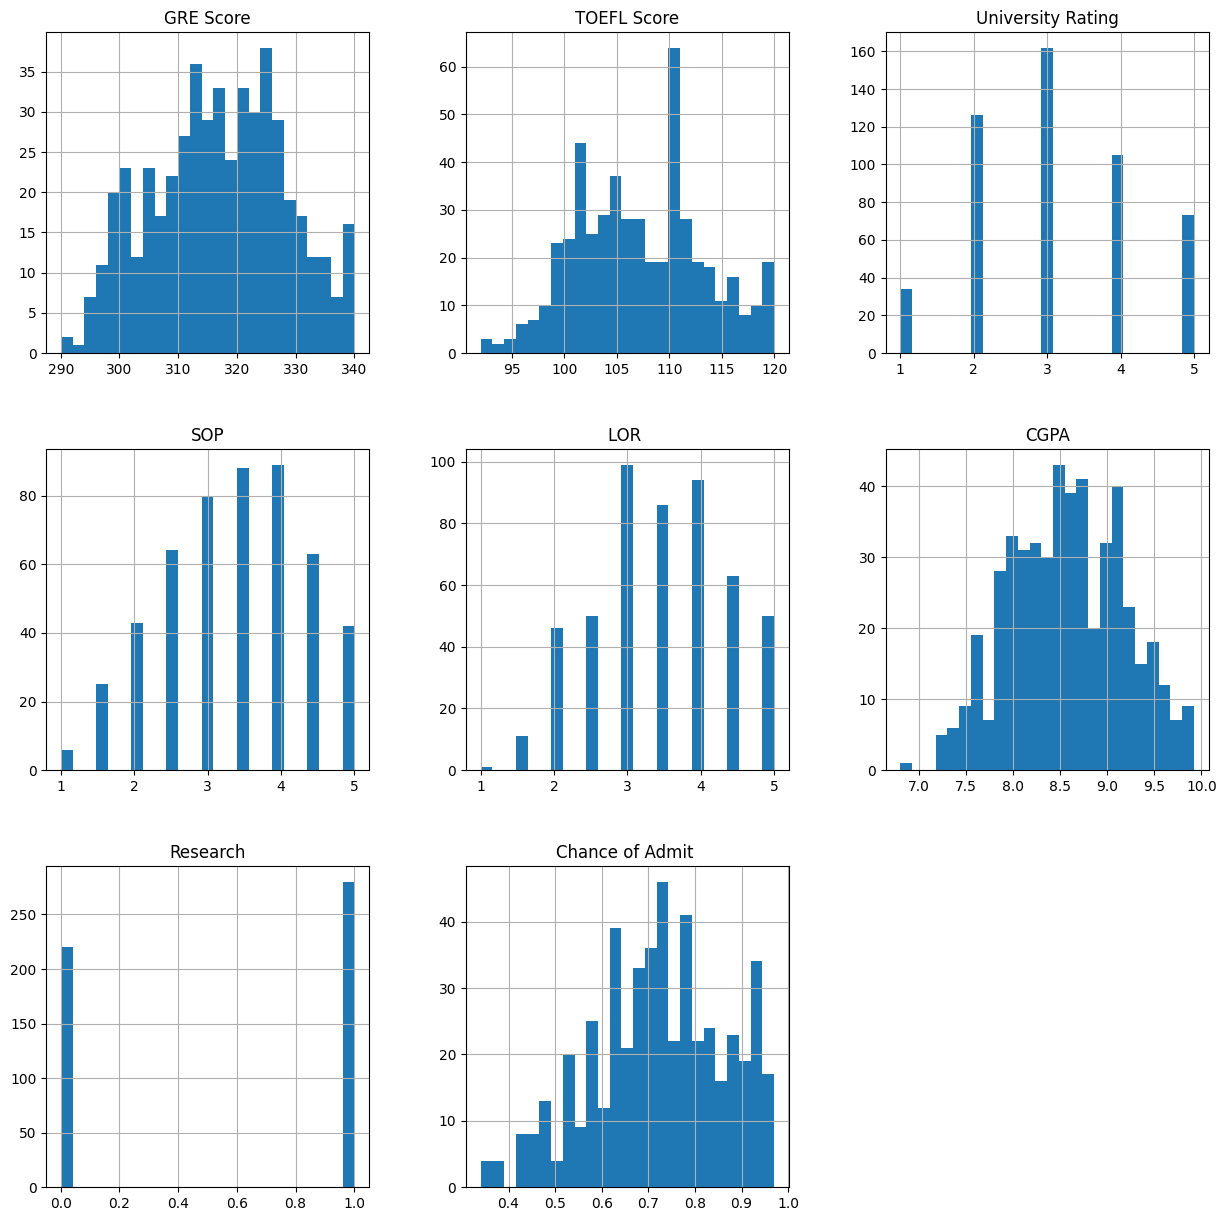

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]
Y = pd.DataFrame(Y)

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1
#En primer lugar se realizó el preprocesamiento para escalar las variables de entrada

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

Dado que este es un problema de regresión y los valores de Y esta entre 0 y 1, lo que implica que las diferencias entre la predicción y el valor real estará en ese mismo rango, para la función de perdida se decidió usar el MAE dado que el MSE "reduciría" la diferencia al ser el cuadrado de un número menor a 1.

Para determinar el número de épocas, se realizó con ayuda de la gráfica hasta que se estabilizaran las curvas evaluadas.

Por último, para definir el optimizador se decidió probar 3 de estos y elegir el de mejor desempeño, los probados fueron:
* Gradient descent - sgd
* RMSprop algorithm - RMSprop
* Adam algorithm - Adam

In [8]:
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

output_var = yTrain.shape[1]
dims = xTrain.shape[1]

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


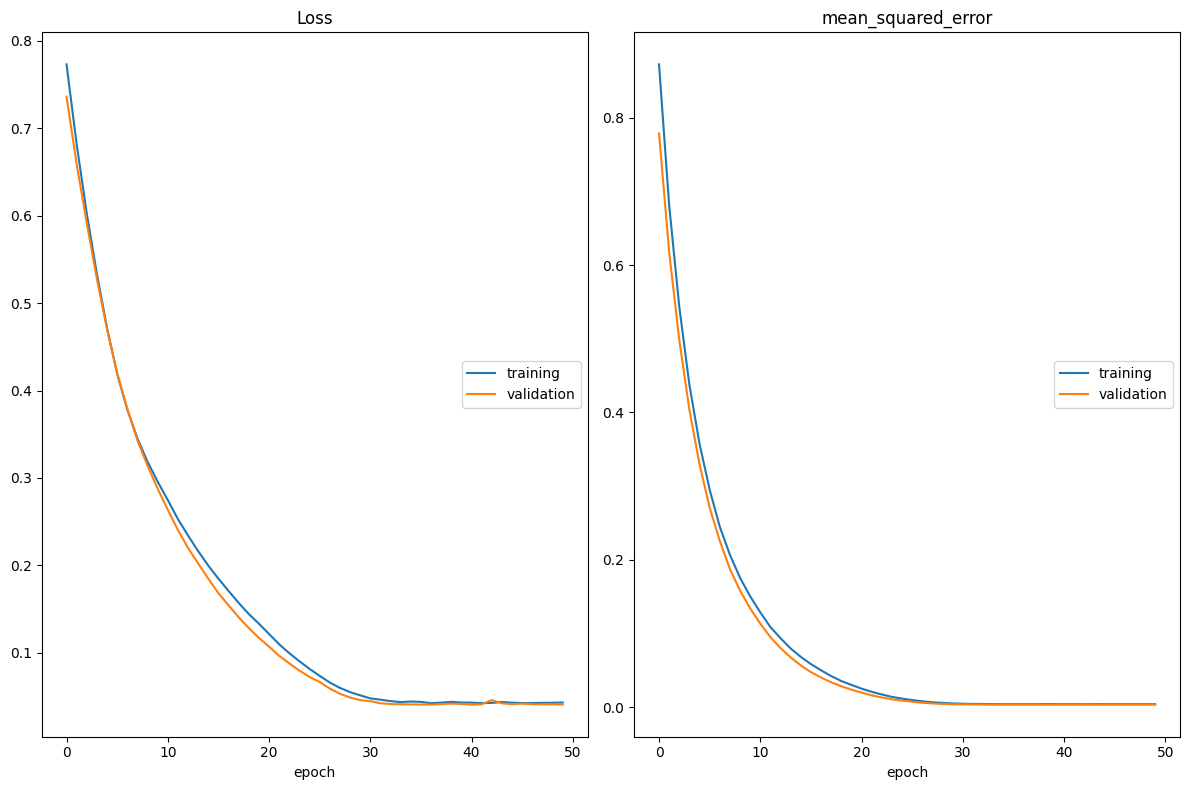

Loss
	training         	 (min:    0.042, max:    0.773, cur:    0.043)
	validation       	 (min:    0.041, max:    0.736, cur:    0.041)
mean_squared_error
	training         	 (min:    0.004, max:    0.872, cur:    0.004)
	validation       	 (min:    0.003, max:    0.779, cur:    0.003)
5/5 [==============================] - 0s 1ms/step
El modelo muestra un MAE de 0.040684354488054915 en el set de Test
El modelo muestra un MSE de 0.003326293610067367 en el set de Test


In [9]:
K.clear_session()
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
y_pred = model.predict(xTest)
mae1 = mean_absolute_error(yTest, y_pred)
mse1 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae1))
print("El modelo muestra un MSE de {} en el set de Test".format(mse1))

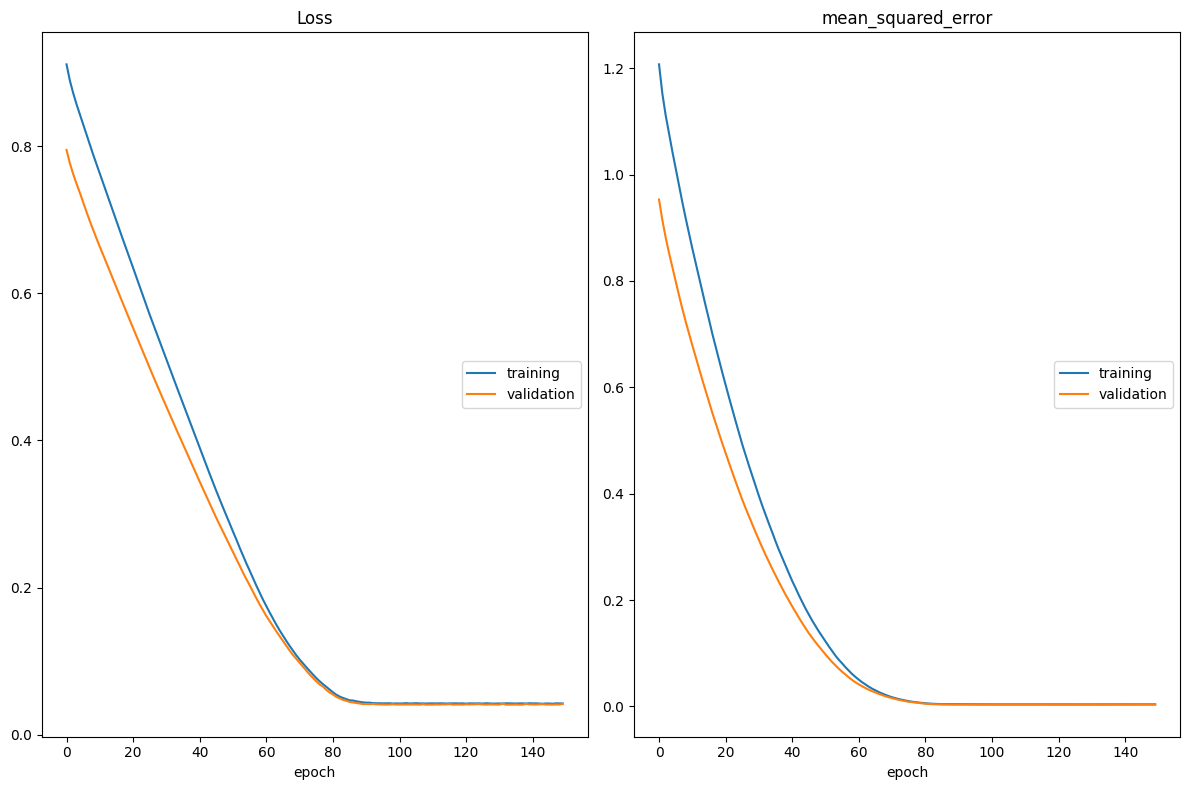

Loss
	training         	 (min:    0.042, max:    0.912, cur:    0.042)
	validation       	 (min:    0.041, max:    0.795, cur:    0.042)
mean_squared_error
	training         	 (min:    0.004, max:    1.207, cur:    0.004)
	validation       	 (min:    0.003, max:    0.953, cur:    0.003)
5/5 [==============================] - 0s 751us/step
El modelo muestra un MAE de 0.041626192863782246 en el set de Test
El modelo muestra un MSE de 0.0034882257442950754 en el set de Test


In [10]:
K.clear_session()
model2 = Sequential()
model2.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='RMSProp', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model2.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=150, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
y_pred = model2.predict(xTest)
mae2 = mean_absolute_error(yTest, y_pred)
mse2 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae2))
print("El modelo muestra un MSE de {} en el set de Test".format(mse2))

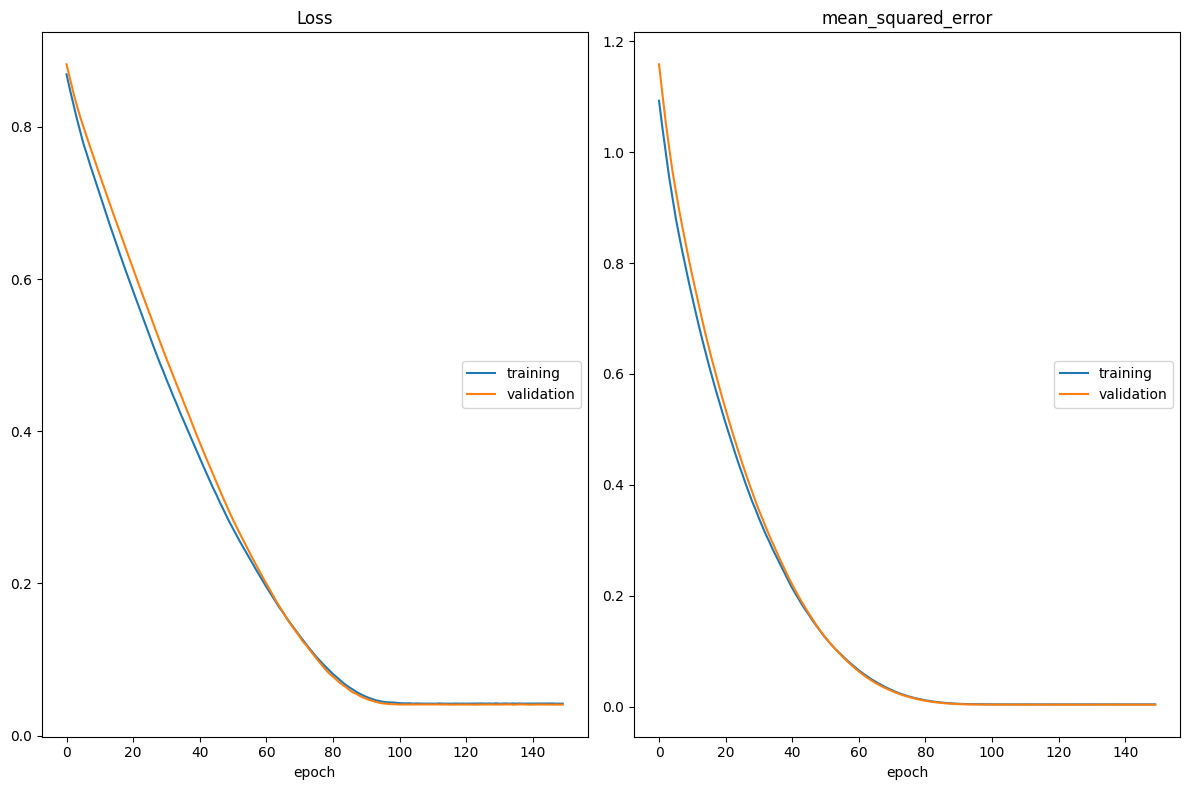

Loss
	training         	 (min:    0.042, max:    0.869, cur:    0.042)
	validation       	 (min:    0.041, max:    0.882, cur:    0.041)
mean_squared_error
	training         	 (min:    0.004, max:    1.093, cur:    0.004)
	validation       	 (min:    0.003, max:    1.159, cur:    0.003)
5/5 [==============================] - 0s 1ms/step
El modelo muestra un MAE de 0.04068412960370382 en el set de Test
El modelo muestra un MSE de 0.0032636285654777286 en el set de Test


In [11]:
K.clear_session()
model3 = Sequential()
model3.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model3.compile(optimizer='Adam',loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model3.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=150, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
y_pred = model3.predict(xTest)
mae3 = mean_absolute_error(yTest, y_pred)
mse3 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae3))
print("El modelo muestra un MSE de {} en el set de Test".format(mse3))

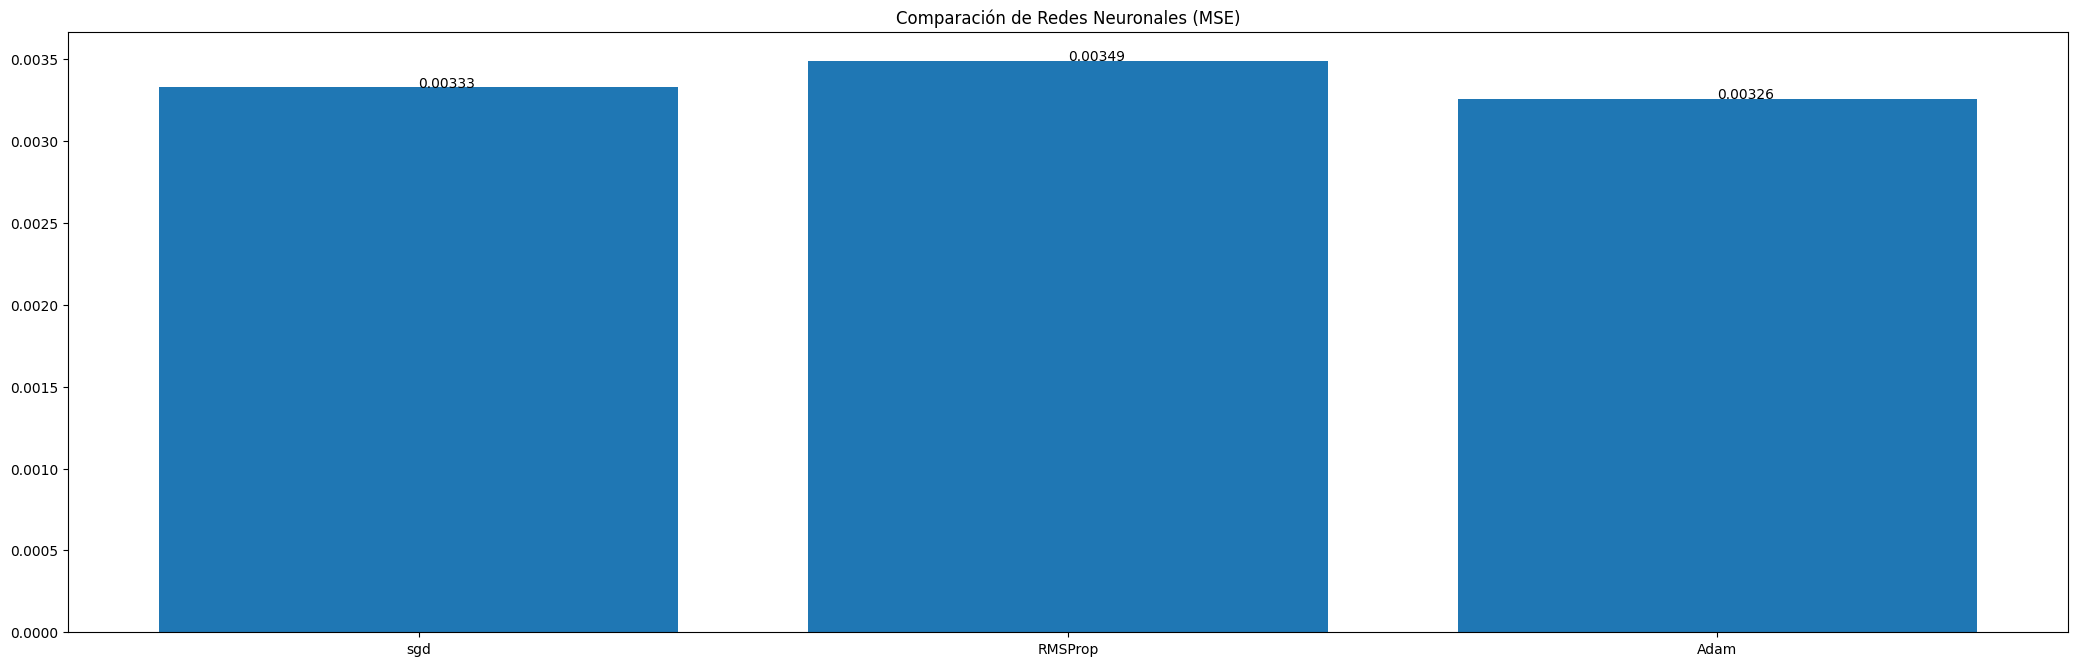

0.00326


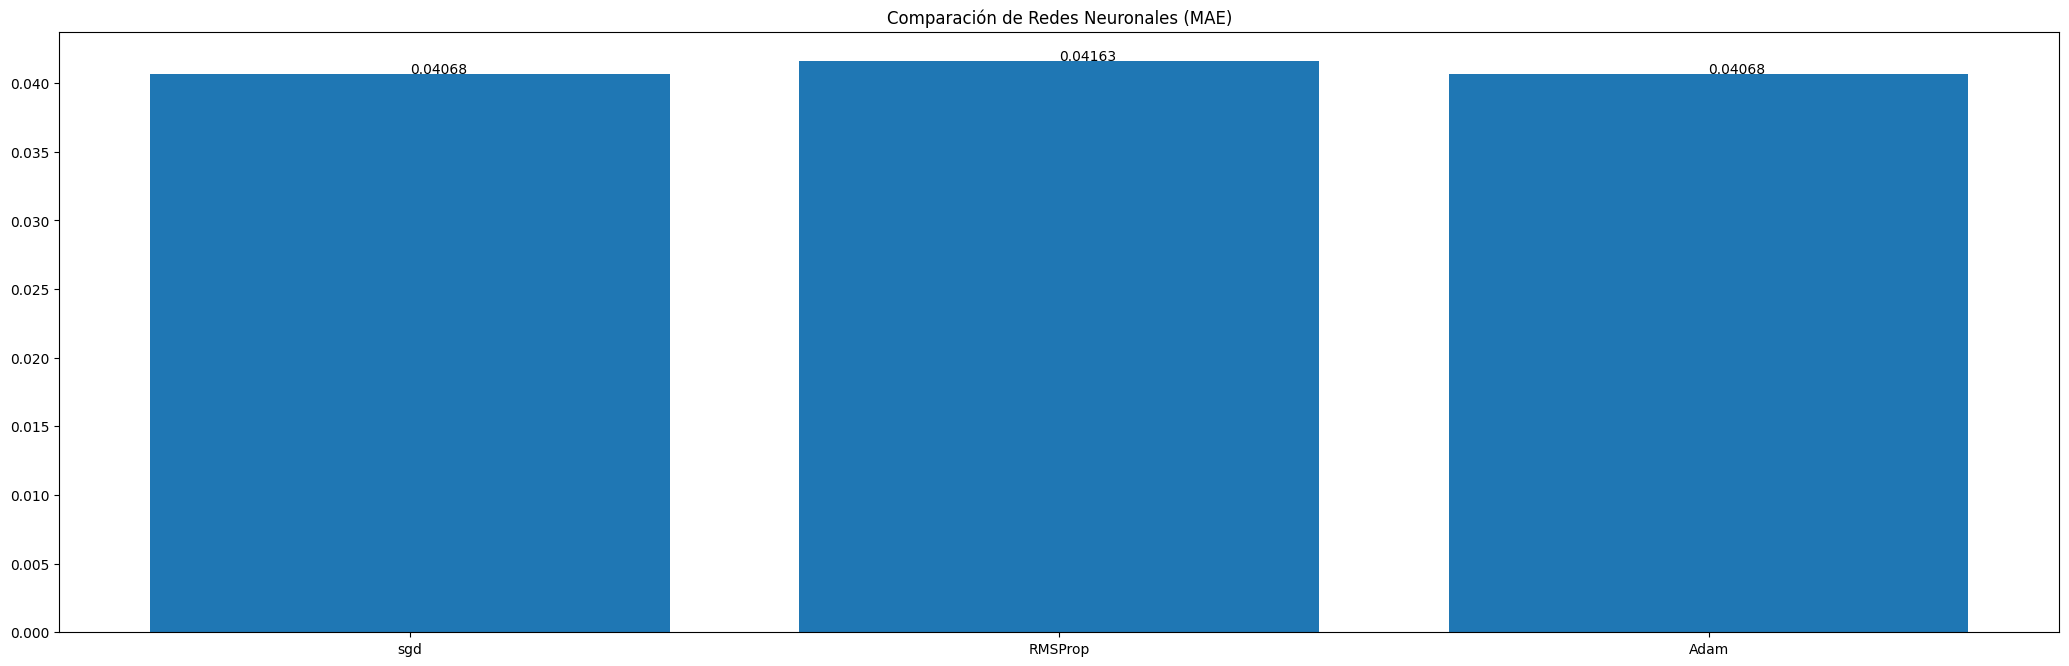

0.04068


In [12]:
#Gráfico comparativo MSE
import matplotlib.pyplot as plt

#Gráfico comparativo MAE
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MSE)")
ejeX = ['sgd', 'RMSProp','Adam']
ejeY = [round(mse1,5), round(mse2,5), round(mse3,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mse1,5), round(mse2,5), round(mse3,5)))

#Gráfico comparativo MAE
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MAE)")
ejeX = ['sgd', 'RMSProp','Adam']
ejeY = [round(mae1,5), round(mae2,5), round(mae3,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mae1,5), round(mae2,5), round(mae3,5)))

A partir de esta comparación se observa que en general los tres algoritmos tiene un desempeño similar, donde el algoritmo Adam tiene un rendimiento ligeramente mejor en MSE: 0.00326 y en MAE: 0.04068.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
# Celda 2
# Inicialmente se crea una segunda separación para crear una segunda submuestra de validación para evitar overfitting en la red multicapa.

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
xTrain2, xVal, yTrain2, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

En este punto se dejaron como parámetros base los determinados en el uni-capa, es decir: optimizador Adam, función de perdida MAE y 150 épocas.

Con esto se procedió a probar 3 tamaños de las capas ocultas, del mismo tamaño de la entrada (7), el número intermedio entre la capa de entrada y la de salida  (4, siguiendo las recomendaciones de Rachmatullah, Santoso y Surendro [Rachmatullah MIC, Santoso J, Surendro K. Determining the number of hidden layer and hidden neuron of neural network for wind speed prediction. PeerJ Comput Sci. 2021 Sep 20;7:e724. doi: 10.7717/peerj-cs.724. PMID: 34616896; PMCID: PMC8459779.] y un numero alto determinado por 2^7 (128)

In [18]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(7, input_shape=(dims,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________
None


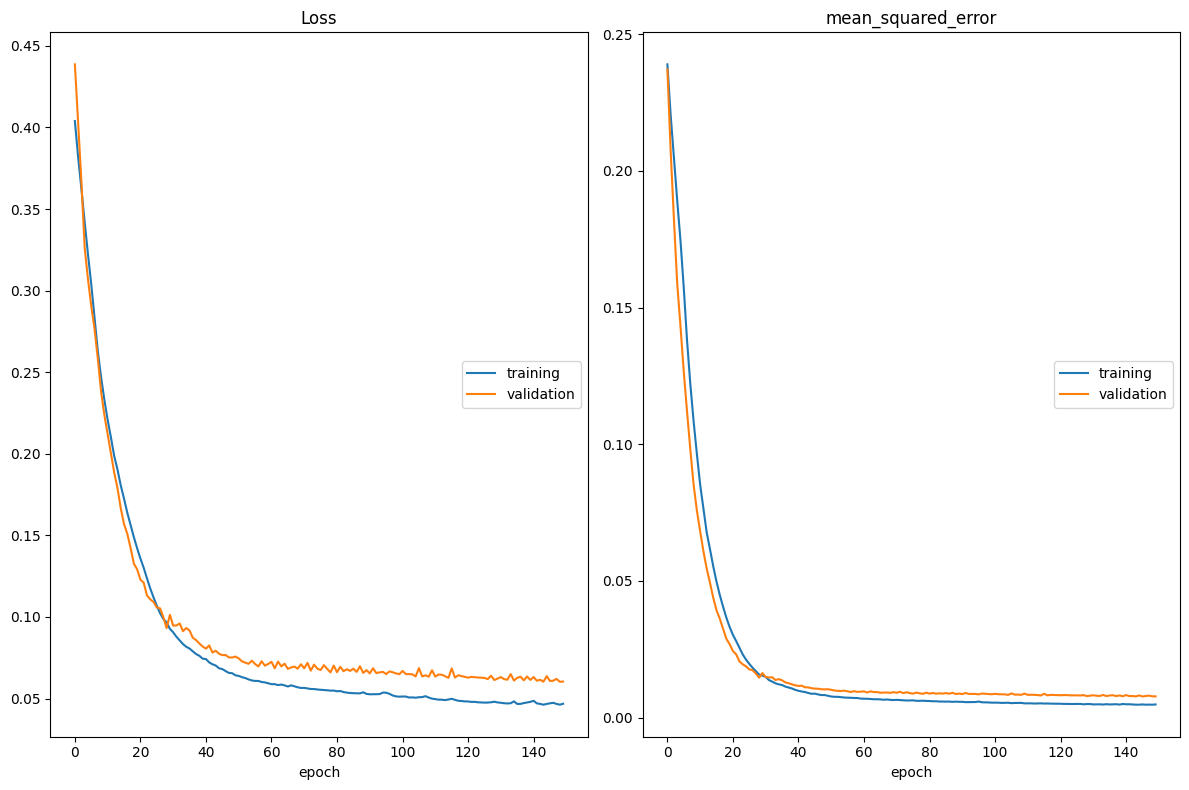

Loss
	training         	 (min:    0.046, max:    0.404, cur:    0.047)
	validation       	 (min:    0.060, max:    0.439, cur:    0.060)
mean_squared_error
	training         	 (min:    0.005, max:    0.239, cur:    0.005)
	validation       	 (min:    0.008, max:    0.237, cur:    0.008)
5/5 [==============================] - 0s 1ms/step
El modelo muestra un MAE de 0.06089635464350383 en el set de Test
El modelo muestra un MSE de 0.007134973614088499 en el set de Test


In [19]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='Adam', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model.fit(xTrain2, yTrain2, 
          verbose=1, 
          epochs=150, 
          validation_data=(xVal, yVal),
          callbacks=[PlotLossesKeras()])
y_pred = model.predict(xTest)
mae11 = mean_absolute_error(yTest, y_pred)
mse11 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae11))
print("El modelo muestra un MSE de {} en el set de Test".format(mse11))

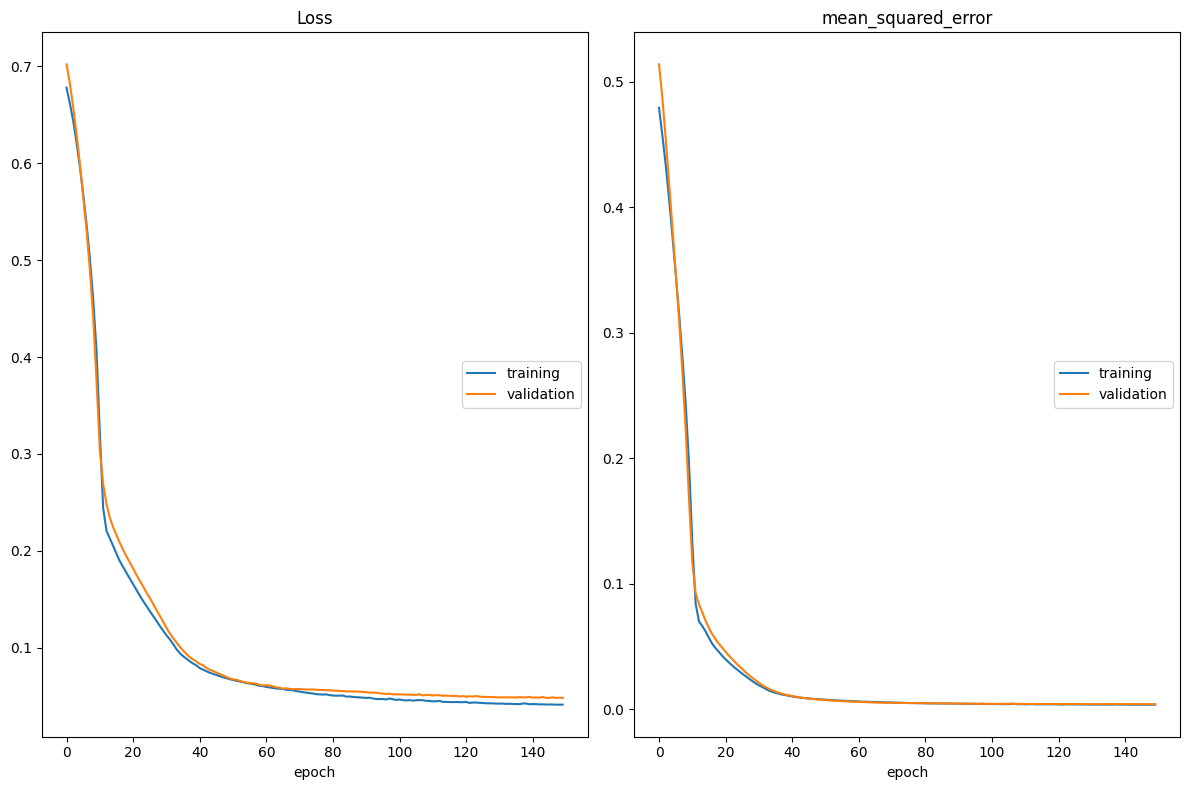

Loss
	training         	 (min:    0.041, max:    0.678, cur:    0.041)
	validation       	 (min:    0.048, max:    0.702, cur:    0.048)
mean_squared_error
	training         	 (min:    0.004, max:    0.479, cur:    0.004)
	validation       	 (min:    0.004, max:    0.514, cur:    0.004)
5/5 [==============================] - 0s 1ms/step
El modelo muestra un MAE de 0.04856659704844157 en el set de Test
El modelo muestra un MSE de 0.0038275195090336145 en el set de Test


In [20]:
K.clear_session()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model2.add(Dense(4, input_shape=(dims,),activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(output_var))
model2.add(Activation('relu'))


# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='Adam', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model2.fit(xTrain2, yTrain2, 
          verbose=1, 
          epochs=150, 
          validation_data=(xVal, yVal),
          callbacks=[PlotLossesKeras()])
y_pred = model2.predict(xTest)
mae22 = mean_absolute_error(yTest, y_pred)
mse22 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae22))
print("El modelo muestra un MSE de {} en el set de Test".format(mse22))

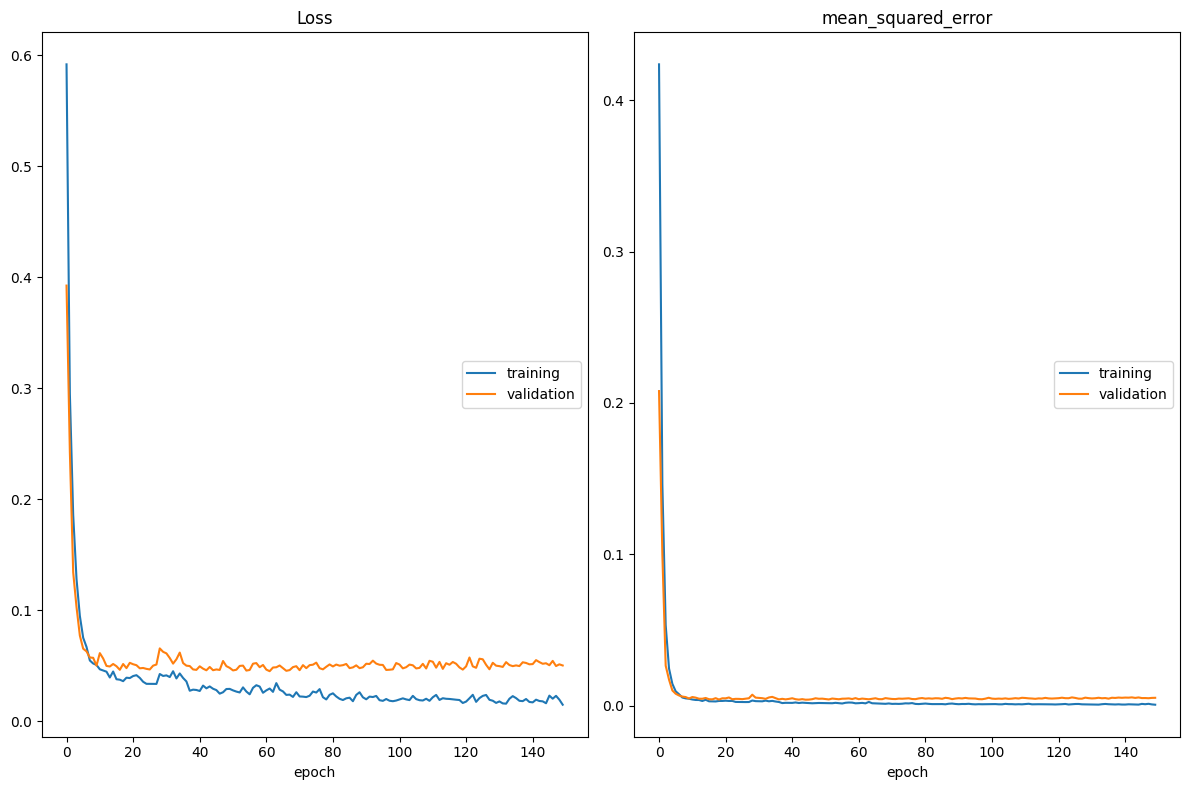

Loss
	training         	 (min:    0.015, max:    0.592, cur:    0.015)
	validation       	 (min:    0.045, max:    0.393, cur:    0.050)
mean_squared_error
	training         	 (min:    0.001, max:    0.424, cur:    0.001)
	validation       	 (min:    0.004, max:    0.208, cur:    0.005)
5/5 [==============================] - 0s 999us/step
El modelo muestra un MAE de 0.0570321827252706 en el set de Test
El modelo muestra un MSE de 0.005872958337822955 en el set de Test


In [21]:
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(128, input_shape=(dims,),activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(output_var))
model3.add(Activation('relu'))

model3.compile(optimizer='Adam', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model3.fit(xTrain2, yTrain2, 
          verbose=1, 
          epochs=150, 
          validation_data=(xVal, yVal),
          callbacks=[PlotLossesKeras()])
y_pred = model3.predict(xTest)
mae33 = mean_absolute_error(yTest, y_pred)
mse33 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae33))
print("El modelo muestra un MSE de {} en el set de Test".format(mse33))

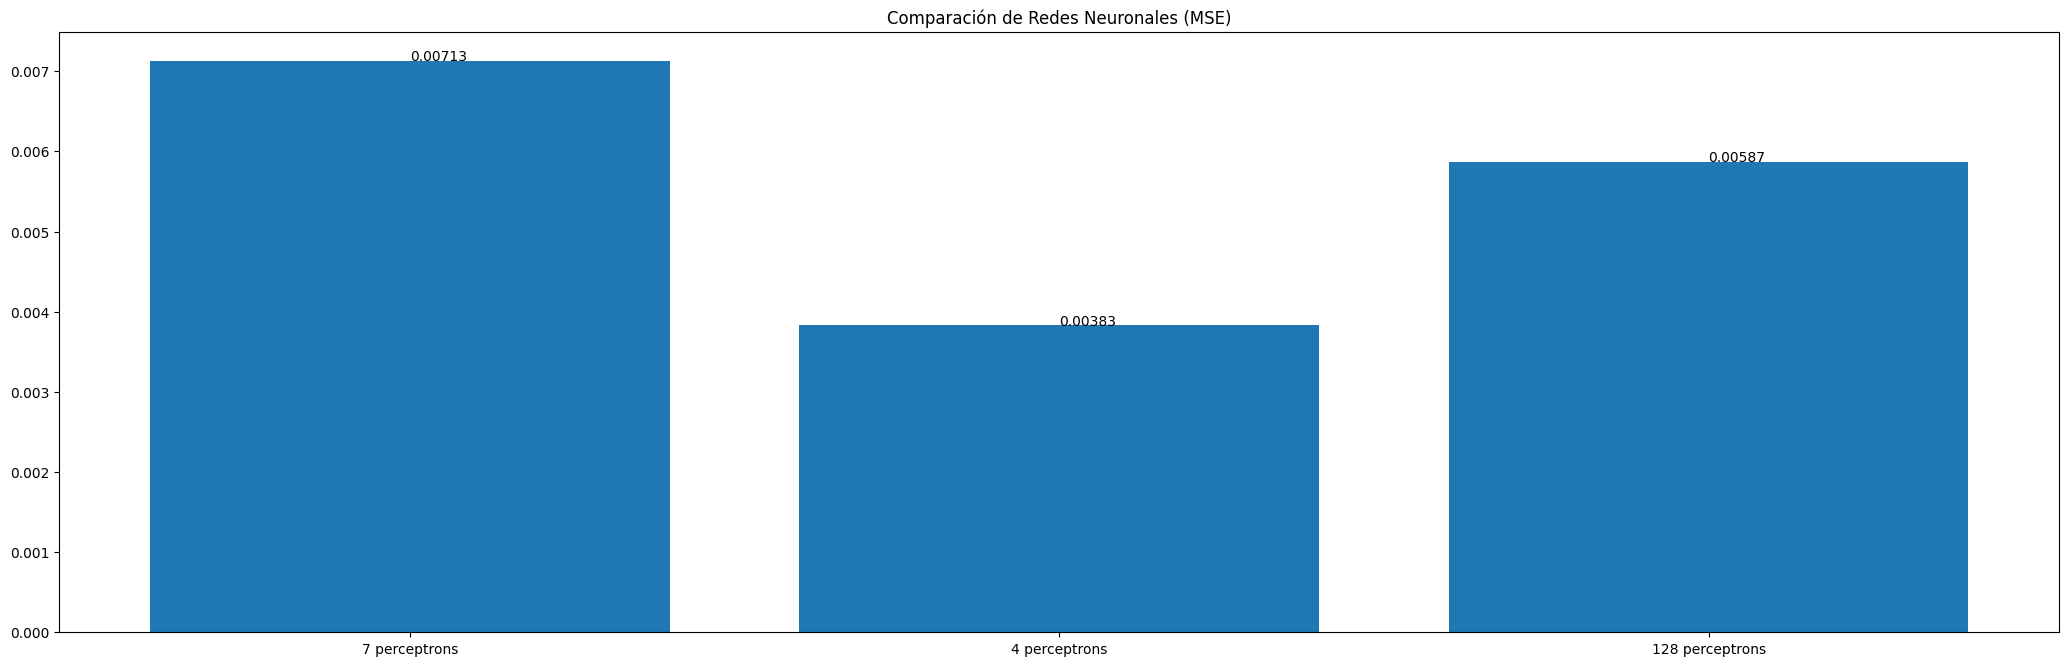

0.00383


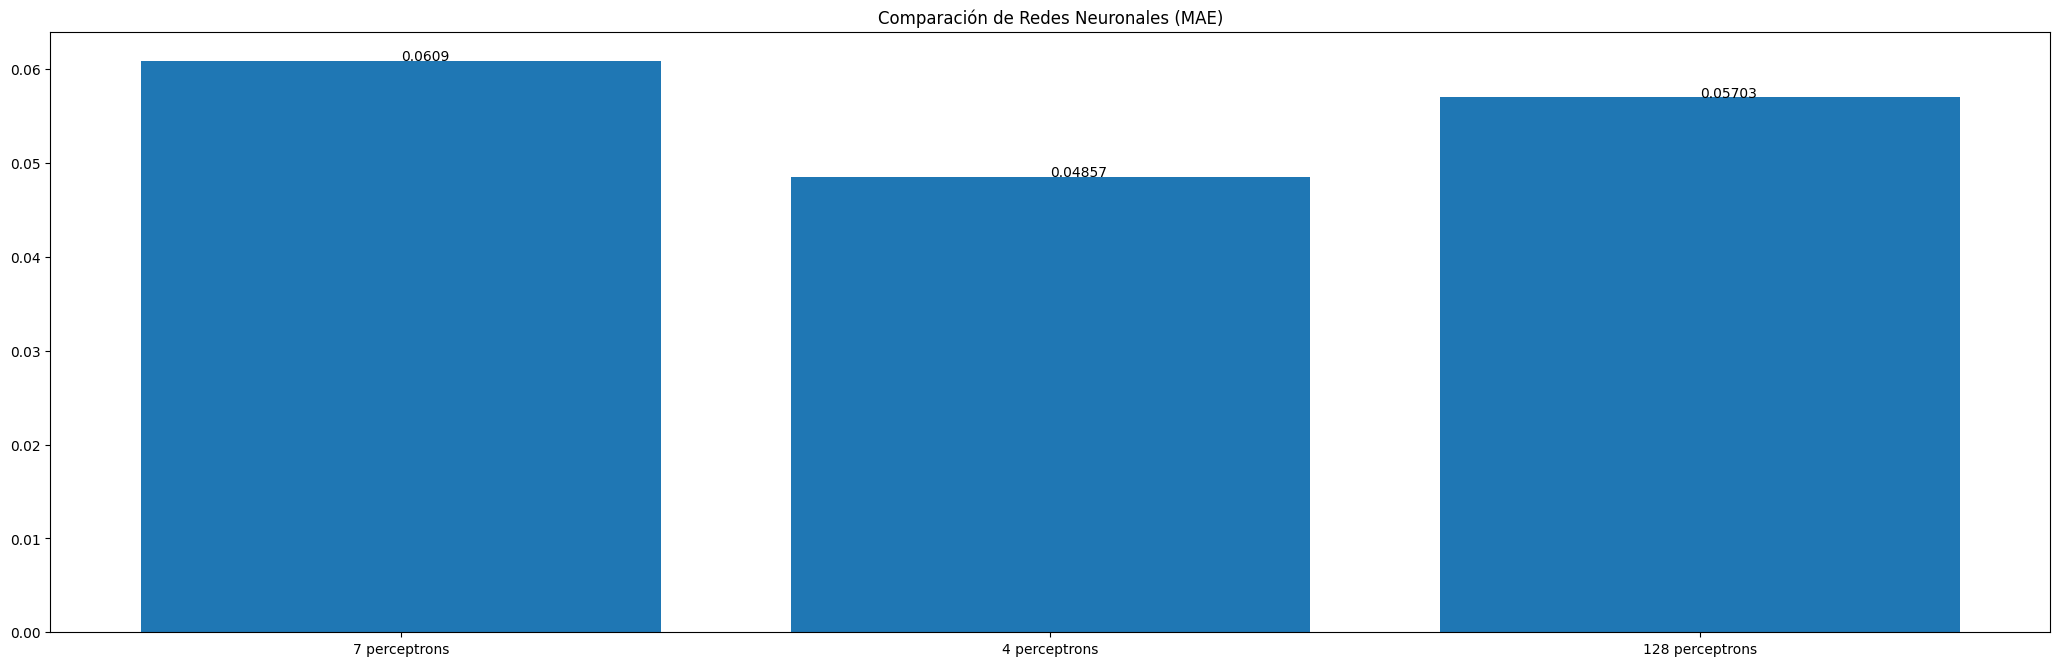

0.04857


In [22]:
#Gráfico comparativo MSE
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MSE)")
ejeX = ['7 perceptrons', '4 perceptrons','128 perceptrons']
ejeY = [round(mse11,5), round(mse22,5), round(mse33,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mse11,5), round(mse22,5), round(mse33,5)))

#Gráfico comparativo MAE
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MAE)")
ejeX = ['7 perceptrons', '4 perceptrons','128 perceptrons']
ejeY = [round(mae11,5), round(mae22,5), round(mae33,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mae11,5), round(mae22,5), round(mae33,5)))

A partir de esta comparación se observa que el modelo con 4 perceptrones en las capas ocultas, tiene un rendimiento mejor en MSE: 0.00383 y en MAE: 0.04857 vs los otros modelos multicapa ensayados, pero no mejora vs el uni-capa.

Adicionalmente, se observa que a mayor número de perceptrones se tiene una mayor variación entre épocas dado el aumento que esto implica en la complejidad del modelo

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Para este punto se decidió utilizar el modelo definido en el punto anterior, es decir con: optimizador Adam, función de perdida MAE, 150 épocas y las capas ocultas con 4 percepciones.

Sobre este modelo se añadió un Dropout con probabilidad de 0.2 y un EarlyStopping con paciencia de 2.

In [31]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(4, input_shape=(dims,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(output_var))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

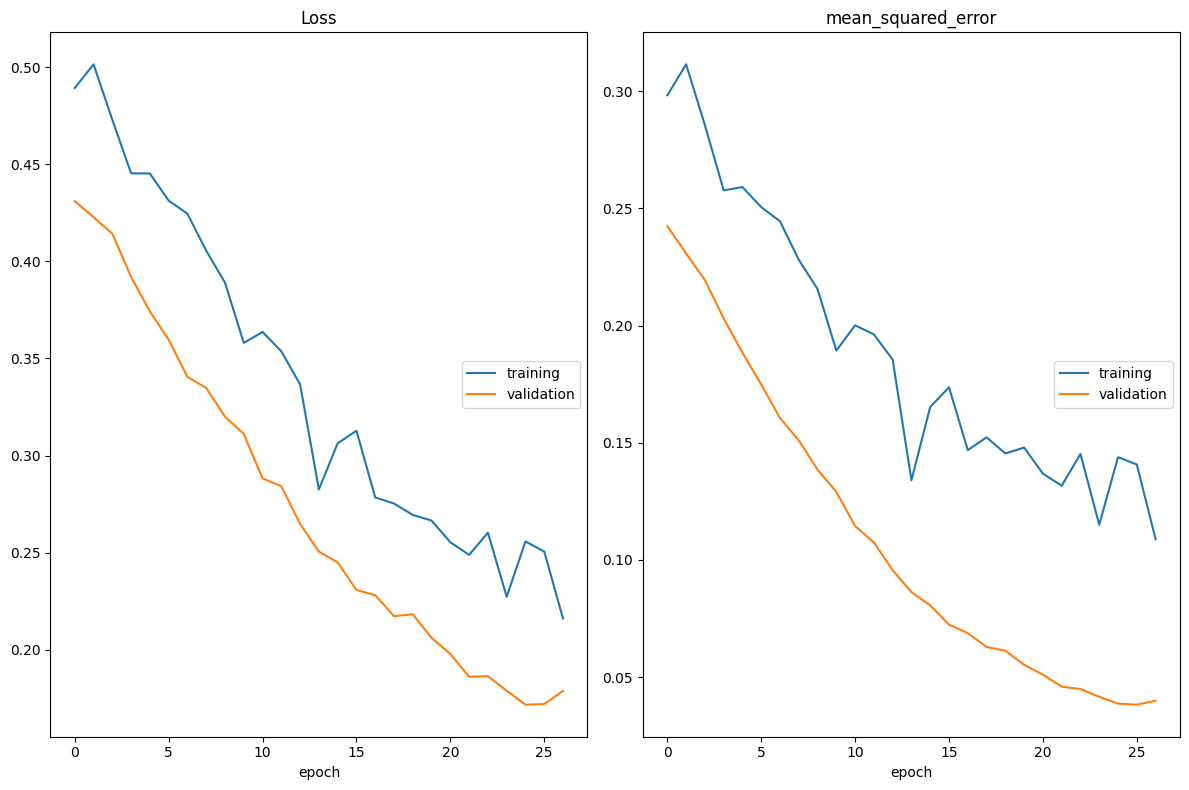

Loss
	training         	 (min:    0.216, max:    0.501, cur:    0.216)
	validation       	 (min:    0.172, max:    0.431, cur:    0.179)
mean_squared_error
	training         	 (min:    0.109, max:    0.311, cur:    0.109)
	validation       	 (min:    0.038, max:    0.242, cur:    0.040)
10/10 [==============================] - 0s 40ms/step - loss: 0.2161 - mean_squared_error: 0.1089 - val_loss: 0.1789 - val_mean_squared_error: 0.0399
Epoch 27: early stopping
5/5 [==============================] - 0s 1ms/step
El modelo muestra un MAE de 0.1801706519325574 en el set de Test
El modelo muestra un MSE de 0.04413617795364117 en el set de Test


In [33]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='Adam', loss='MeanAbsoluteError',metrics='mean_squared_error')

# Entrenamiento de la red neuronal con 150 épocas
model.fit(xTrain2, yTrain2, 
          verbose=1, 
          epochs=150, 
          validation_data=(xVal, yVal),
          callbacks=[best_model, early_stop, PlotLossesKeras()])
y_pred = model.predict(xTest)
mae111 = mean_absolute_error(yTest, y_pred)
mse111 = mean_squared_error(yTest, y_pred)
print("El modelo muestra un MAE de {} en el set de Test".format(mae111))
print("El modelo muestra un MSE de {} en el set de Test".format(mse111))

Se observó que el modelo no mejora y que solo se corrieron 26 épocas, lo que nos indica que el EarlyStopping detuvo el modelo al detectar que la función de pérdida sobre el set de validación no disminuyó en las épocas 25 y 26

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

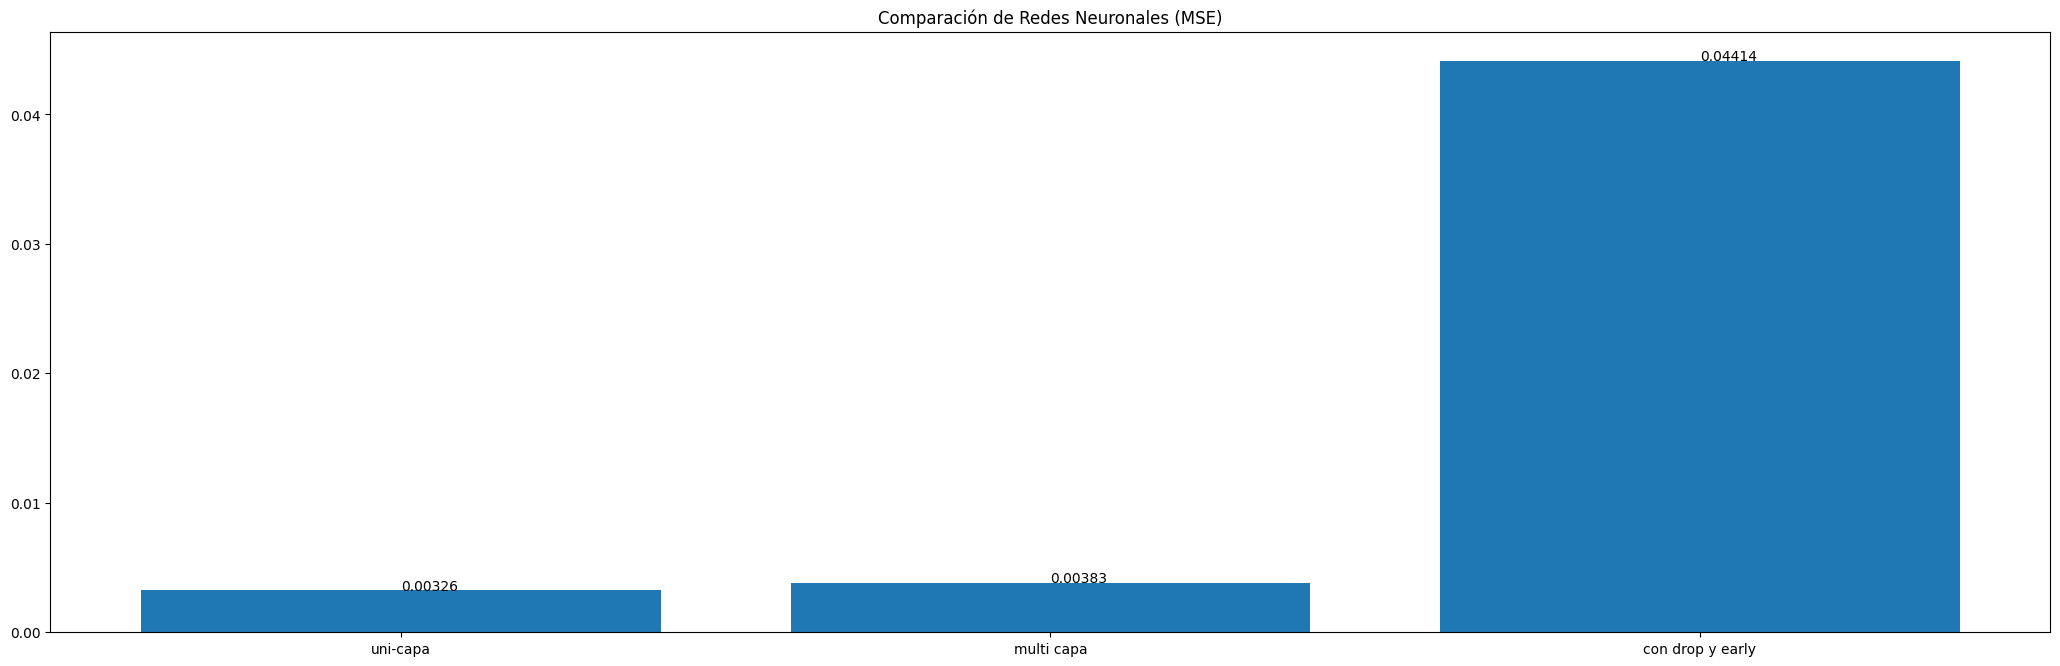

0.00326


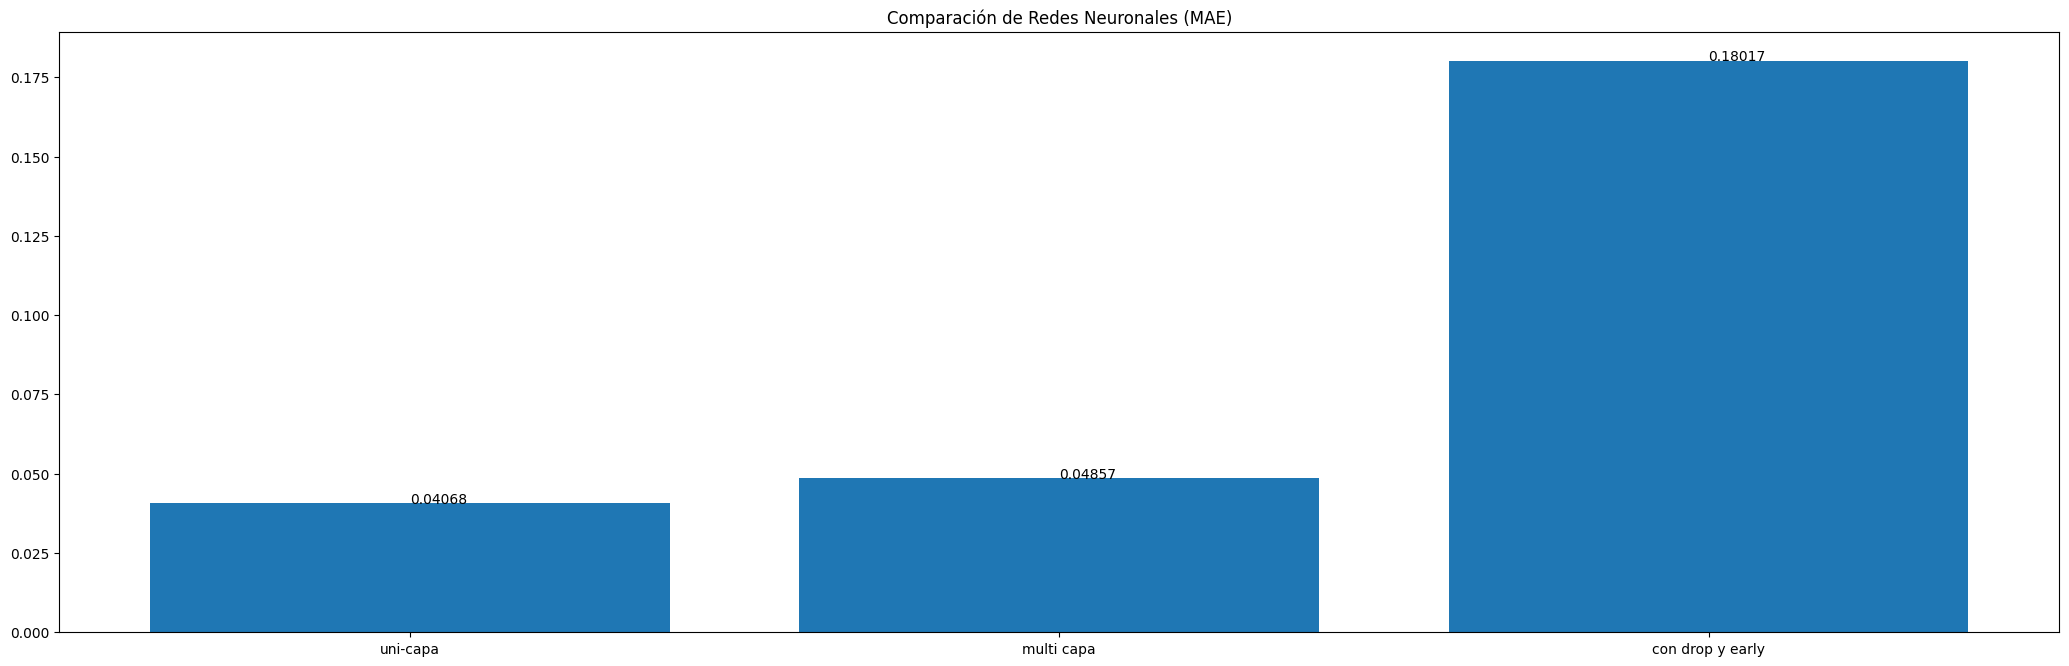

0.04068


In [34]:
# Celda 4
# a continuación se comparan el modelo elegido en cada punto anterior

#Gráfico comparativo MSE
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MSE)")
ejeX = ['uni-capa', 'multi capa','con drop y early']
ejeY = [round(mse3,5), round(mse22,5), round(mse111,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mse3,5), round(mse22,5), round(mse111,5)))

#Gráfico comparativo MAE
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales (MAE)")
ejeX = ['uni-capa', 'multi capa','con drop y early']
ejeY = [round(mae3,5), round(mae22,5), round(mae111,5)]
ax.bar(ejeX,ejeY)
#ax.set_ylim(0.6,0.8)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()
print (min(round(mae3,5), round(mae22,5), round(mae111,5)))

Se observa que el mejor modelo fue el de una capa con un MSE de 0.00326 y un MAE de 0.4068.

La ventaja del modelo de una capa, es su baja complejidad respecto a los otros modelos, lo que le permite estabilizarse más rápido, y en este caso al usar un mismo número de épocas obtener un mejor valor, ya que los otros no lograron estabilizarse totalmente con esta cantidad de épocas. 

Las desventajas del modelo con EarlyStopping es que debido a la complejidad del modelo usado, tiene una alta variación entre épocas mientras se estabiliza, por lo que, en este caso, el EarlyStopping termino demasiado antes el modelo, lo que se refleja en la diferencia de métricas.